<a href="https://colab.research.google.com/github/zavarujs/Sensible-Transfer-Manchester-United-FIFA23/blob/main/SensibleTransferManchesterUnitedFIFA23ProyekInovasiDigitalBisnis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Library

In [ ]:
!pip install lazypredict
# Lazy Predict adalah Library Python
# yang dibuat untuk mempercepat proses pemilihan dan evaluasi model dalam pembelajaran mesin.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
# Mendefinikan Fungsi
def createBarPlot(ax, label, width):
    #Plot data untuk club premier league
    label_data = list(set(epl_df[label]))
    label_data_counts = [list(epl_df[label]).count(i) for i in label_data]
    ax.bar(label_data, label_data_counts, width = width, color = 'red')
    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel('Counts')
    DC_data = epl_df[epl_df['Team Name'] == 'Manchester United'][label].iloc[0]
    ax.bar(DC_data, label_data_counts[label_data.index(DC_data)], label = 'Manchester United',
             color = 'black', width = width)

In [ ]:
def evaluateModels(df, xcols, ycol):
    #menjalankan kumpulan data melalui lzyregressor untuk mengevaluasi kinerja model
    X = test_df[xcols]
    y = test_df[ycol]
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 42)
    clf = LazyRegressor(verbose=0, ignore_warnings = True, custom_metric = None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)
    return models, predictions

def createAverage(df, cols, alias):
    df[alias] = df[cols].mean(axis = 1)
    return df

# Import and clean the data

In [ ]:
#Import and clean the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


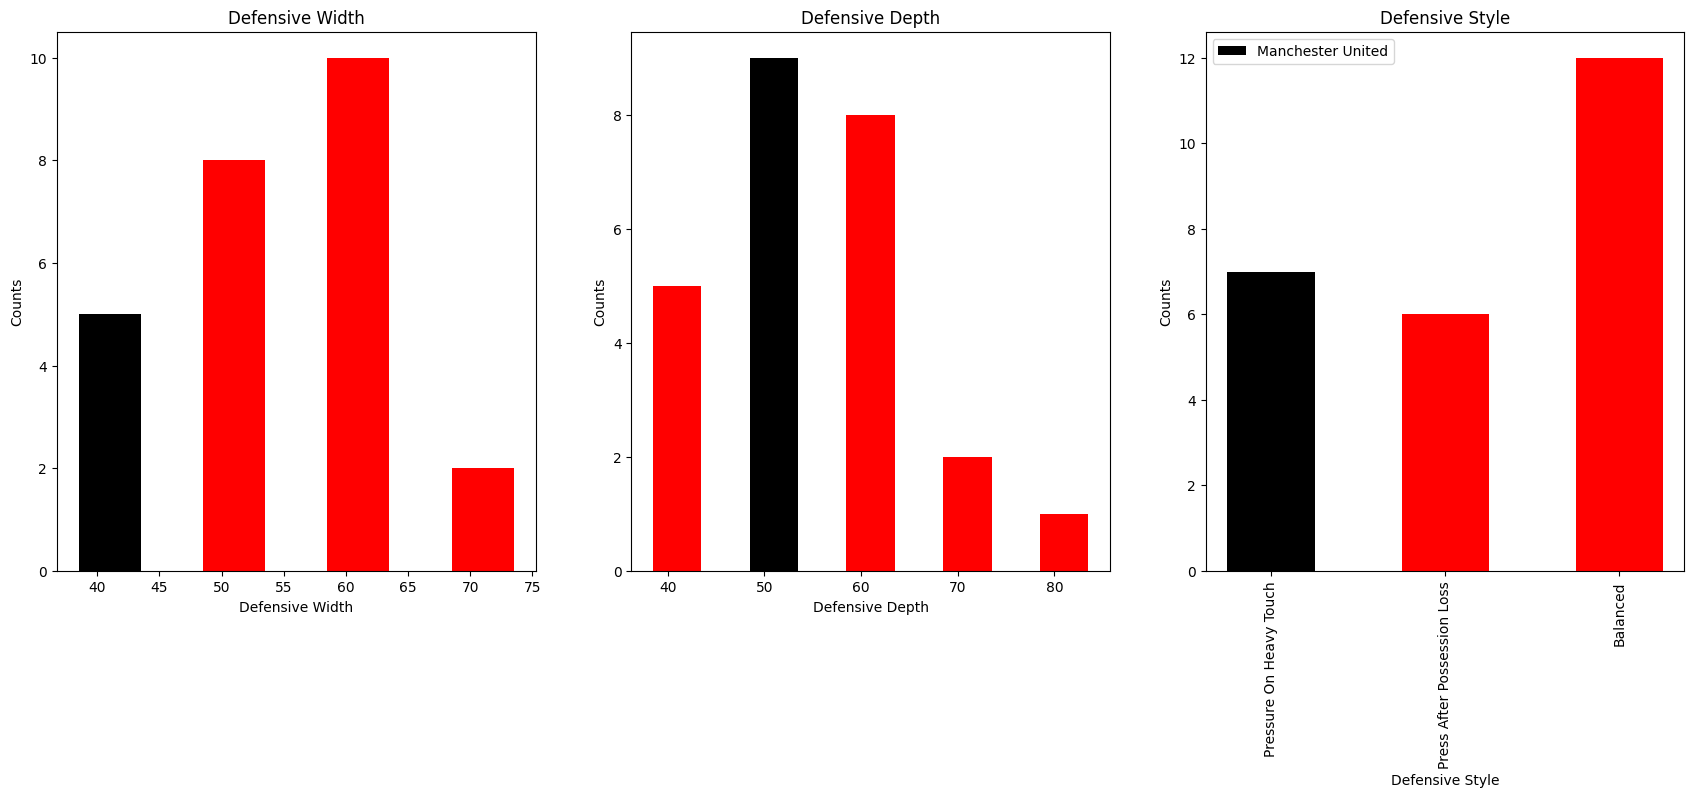

In [ ]:
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[:30]
teams_df = pd.read_csv("/content/drive/My Drive/SensibleTransferManchesterUnited_FIFA23_ProyekInovasiDigitalBisnis/male_teams.csv", low_memory=False)

boolFilter = (teams_df['league_name'] == 'Premier League') &\
             (teams_df['fifa_version'] == 23) &\
             (teams_df['fifa_update'] == 9)

relevantCols = ['team_name',
                'def_team_width',
                'def_team_depth',
                'def_style',
                'off_build_up_play',
                'off_chance_creation',
                'off_team_width']

cleanNames = ['Team Name',
              'Defensive Width',
              'Defensive Depth',
              'Defensive Style',
              'Build Up Method',
              'Chance Creation Method',
              'Offensive Width']

epl_df = pd.DataFrame(teams_df[boolFilter][relevantCols])
epl_df.columns = cleanNames
fig, ax = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(21)
del(teams_df)

#Plot Defensive Widths
createBarPlot(ax[0], 'Defensive Width', 5)
createBarPlot(ax[1], 'Defensive Depth', 5)
createBarPlot(ax[2], 'Defensive Style', 0.5)

plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Gaya Bermain Team (how team would like to play)

**Pengaturan Formasi Pertahanan (Defensive Set Up)**

Grafik di atas menunjukkan formasi bertahan dasar dari masing-masing tim di EPL. Lebar Formasi Pertahanan (Defensive Width) mengacu pada seberapa rapat para pemain mengatur posisi saat tim tidak menguasai bola. Nilai yang lebih tinggi menunjukkan para pemain lebih menyebar. Sedangkan Kedalaman Formasi Pertahanan (Defensive Depth) mengacu pada seberapa tinggi di lapangan para pemain bertahan berhadapan dengan lawan. Angka yang lebih rendah menunjukkan tim bertahan lebih dekat ke gawang mereka.

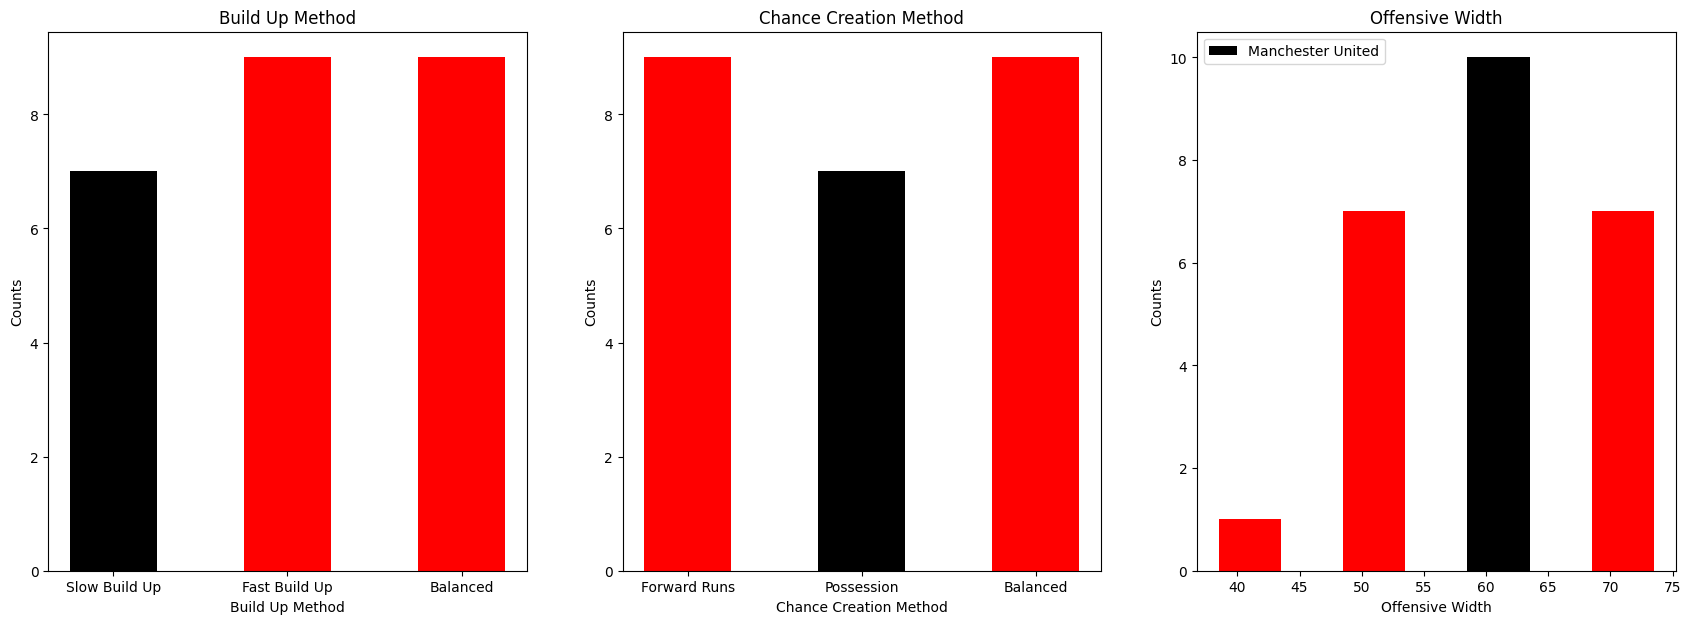

In [ ]:
#Sekarang mari kita lihat bagaimana Manchester United saat ini bersiap untuk Menyerang
fig, ax = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(21)

createBarPlot(ax[0], 'Build Up Method', 0.5)
createBarPlot(ax[1], 'Chance Creation Method', 0.5)
createBarPlot(ax[2], 'Offensive Width', 5)

plt.legend()
plt.show()

**Pengaturan Serangan (Offensive Set Up)**

Grafik di atas menunjukkan berbagai cara untuk mengukur bagaimana setiap tim bermain saat mereka menguasai bola. Metode Build Up (Membangun Serangan) menjelaskan bagaimana tim mengeluarkan bola dari area permainan mereka sendiri.  

Manchester United memilih untuk memainkan bola-bola dari belakang dengan slow build up dan memainkan posession untuk menaikan area penyerangan serta memainkan lebar lapangan untuk variasi passing direct.



# Model Pelatihan untuk Memprediksi Atribut Pemain

Sekarang setelah kita sedikit memahami tim dan gaya bermain yang diinginkan, kita bisa mulai melihat model pelatihan pada atribut pemain untuk memprediksi pemain mana yang terbaik untuk direkrut. Mengingat harapan manajemen, tidak ada tekanan langsung untuk sukses saat ini. Jadi, kita bisa merekrut pemain dengan peringkat keseluruhan yang lebih rendah sekarang dengan harapan mereka dapat berkembang sesuai sistem permainan kita.

Saya percaya secara keseluruhan, pemain di versi FIFA mendatang sebagian besar ditentukan oleh 3 faktor utama:

Kemampuan Keseluruhan (Overall Ability): Rata-rata tertimbang dari atribut berdasarkan posisi pemain yang dirancang untuk memberikan gambaran kualitas pemain, peringkat dari 1 hingga 99. Pemain dengan kemampuan keseluruhan yang tinggi kemungkinan akan terus memiliki kemampuan yang tinggi dalam waktu dekat.
Usia: Usia pemain. Pemain yang lebih muda lebih mungkin untuk berkembang dan tumbuh lebih cepat daripada pemain yang sedang berada di puncak performa.
Potensi: Skor yang diberikan kepada setiap pemain oleh EA yang menentukan peringkat kemampuan yang mereka yakini dapat dicapai pemain di masa jayanya. Dengan asumsi peringkat tersebut masuk akal, seorang pemain kemungkinan akan tumbuh menuju potensinya.
Saya ingin tim untuk 'puncak' dalam waktu sekitar 4 tahun, karena ini memberi kita keseimbangan yang wajar antara mendapatkan hasil secepat mungkin dan meluangkan waktu untuk mencapainya. Untuk mengevaluasi posisi pemain secara keseluruhan dalam 4 tahun, saya akan menggunakan data FIFA 19, dan membandingkan pemain yang ada di FIFA 19 dan 23 untuk memperkirakan bagaimana kemungkinan perkembangan pemain dalam 4 tahun. Pendekatan pertama hanya akan mencoba memprediksi kemampuan pemain secara keseluruhan

In [ ]:
all_players_df = pd.read_csv("/content/drive/My Drive/SensibleTransferManchesterUnited_FIFA23_ProyekInovasiDigitalBisnis/male_players (legacy).csv", engine = 'python')

df_19 = all_players_df[(all_players_df['fifa_version'] == 19) & (all_players_df['fifa_update'] == 2)]
df_23 = all_players_df[(all_players_df['fifa_version'] == 23) & (all_players_df['fifa_update'] == 2)]
test_df = pd.merge(df_19,
                   df_23[['player_id', 'overall']],
                   how = 'inner',
                   suffixes = ['_19','_23'],
                   on = 'player_id')

xcols = ['overall_19', 'age', 'potential']
ycol = 'overall_23'
models, predictions = evaluateModels(test_df, xcols, ycol)
models

100%|██████████| 30/30 [00:34<00:00,  1.15s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.59,0.59,3.69,8.41
NuSVR,0.59,0.59,3.70,1.99
GradientBoostingRegressor,0.59,0.59,3.72,0.45
HistGradientBoostingRegressor,0.58,0.58,3.73,2.84
LassoLarsIC,0.58,0.58,3.75,0.05
LassoLarsCV,0.58,0.58,3.75,0.03
LarsCV,0.58,0.58,3.75,0.03
Lars,0.58,0.58,3.75,0.02
OrthogonalMatchingPursuitCV,0.58,0.58,3.75,0.02


Setelah melatih model awal, kami mendapatkan hasil yang agak tidak terduga. Fitur-fitur yang telah kami uraikan sebagai faktor penting untuk menentukan pertumbuhan pemain tampaknya tidak menjadi tolok ukur yang baik untuk semuanya. Model kami hanya menjelaskan sekitar 58% dari varians yang kami lihat pada fitur yang diprediksi. Ada beberapa kemungkinan alasan untuk ini:

1. **Pertumbuhan Pemain Non-Linier:**  Mungkin saja pertumbuhan pemain bersifat non-linier. Artinya, kemampuan pemain tidak selalu meningkat secara bertahap. Hal ini bisa jadi sulit untuk ditangkap oleh model linear yang kita pilih, karena model linear berasumsi pada hubungan yang proporsional antara variabel.

2. **Akurasi Fitur Potensi:**  Kemungkinan lainnya adalah asumsi kita tentang fitur "potensi" sebagai ukuran akurat dari kemampuan puncak pemain mungkin tidak sepenuhnya benar. Skor potensi yang diberikan EA mungkin tidak selalu mencerminkan kemampuan tertinggi yang bisa dicapai pemain tersebut.


In [ ]:
demo_df = test_df[['short_name', 'overall_19', 'age', 'potential', 'overall_23']]
demo_df = demo_df[(demo_df['overall_19'] > demo_df['overall_23']) & (demo_df['overall_19']<demo_df['potential'])]
testCount = test_df.shape[0]
demoCount = demo_df.shape[0]
print('{}% pemain mengalami penurunan (regressed)'.format(round((demoCount/ testCount)*100, 2)))
demo_df = test_df[['short_name', 'overall_19', 'age', 'potential', 'overall_23']]
demo_df = demo_df[(demo_df['potential'] < demo_df['overall_23']) & (demo_df['overall_19']<demo_df['potential'])]
testCount = test_df.shape[0]
demoCount = demo_df.shape[0]
print('{}% pemain melampaui potensi mereka (exceeded their potential)'.format(round((demoCount/ testCount)*100, 2)))

21.07% pemain mengalami penurunan (regressed)
9.28% pemain melampaui potensi mereka (exceeded their potential)


Dari uraian di atas, kita dapat melihat bahwa meskipun semua pemain dalam sampel kita memiliki peringkat potensial yang lebih tinggi daripada kemampuan mereka saat ini, 12,49% pemain justru memiliki skor keseluruhan yang lebih buruk di FIFA 23 dibandingkan dengan FIFA 19. Selain itu, persentase pemain yang melampaui potensi yang diharapkan juga tinggi. Hal ini tentu saja menimbulkan masalah untuk analisis kita. Jika kita tidak bisa benar-benar mengandalkan fitur "potensi" untuk memprediksi kualitas pemain di masa depan, akan sangat sulit untuk merekomendasikan pemain untuk dibeli.

# Scouting Defenders

Karena fitur keseluruhan pemain (overall ability) sulit diprediksi karena banyak faktor yang memengaruhi perkembangan pemain, mungkin lebih mudah untuk memprediksi pengembangan pemain berdasarkan atribut per atribut.

Kita telah menetapkan profil pemain yang ingin kita datangkan. Sekarang, kita dapat mengambil atribut-atribut ini secara terpisah dan membuat prediksi tersendiri untuk masing-masing atribut.

Seperti yang telah kita uraikan sebelumnya, kita ingin para pemain belakang kita untuk bisa memainkan umpan panjang yang akurat (karena kita ingin memaksimalkan offensive width untuk variasi passing direct). Oleh karena itu, mari kita mulai dengan memprediksi bagaimana atribut umpan panjang berubah seiring waktu.

In [ ]:
cols = ['skill_long_passing', 'movement_sprint_speed', 'defending_marking_awareness']
alias = 'defender_attributes'
def_19 = createAverage(df_19, cols, alias)
def_23 = createAverage(df_23, cols, alias)

test_df = pd.merge(df_19,
                   df_23[['player_id', 'defender_attributes']],
                   how = 'inner',
                   suffixes = ['_19','_23'],
                   on = 'player_id')

xcols = ['defender_attributes_19', 'age', 'potential']
ycol = 'defender_attributes_23'
models, predictions = evaluateModels(test_df, xcols, ycol)
models

100%|██████████| 30/30 [00:33<00:00,  1.10s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.87,0.87,4.57,8.68
GradientBoostingRegressor,0.87,0.87,4.59,0.43
HistGradientBoostingRegressor,0.86,0.86,4.67,0.42
NuSVR,0.86,0.86,4.71,1.84
ElasticNetCV,0.85,0.85,4.85,0.14
LassoCV,0.85,0.85,4.86,0.18
BayesianRidge,0.85,0.85,4.86,0.02
LarsCV,0.85,0.85,4.86,0.03
Lars,0.85,0.85,4.86,0.03


Langsung dari awal, model ini tampaknya jauh lebih bermanfaat. Kita dapat menjelaskan sekitar 70% dari varians dalam umpan panjang menggunakan atribut yang telah kita masukkan ke dalam model.  

Mari kita masukkan data untuk FIFA 23 ke dalam model dan lihat bagaimana model tersebut memprediksi bagaimana pemain akan berkembang di masa depan


In [ ]:
from sklearn.linear_model import LassoCV

predict_df = df_23[['defender_attributes', 'age', 'potential']]
predict_df.columns = ['defender_attributes_19', 'age', 'potential']

model = LassoCV()
model.fit(test_df[xcols], test_df[ycol])
df_23['defender_attributes_prediction'] = model.predict(predict_df)
def_df = df_23[['short_name',
                'overall',
                'value_eur',
                'wage_eur',
                'age',
                'nationality_name',
                'club_name',
                'player_positions',
                'defender_attributes',
                'defender_attributes_prediction']].sort_values(by = ['defender_attributes_prediction'],
                 ascending = False)
DC_df = def_df[['CB' in def_df['player_positions'].iloc[i] for i in range(def_df['player_positions'].shape[0])]]
DC_df = DC_df[DC_df['club_name'] == 'Manchester United']
DC_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,defender_attributes,defender_attributes_prediction
143409,L. Martínez,81,35000000.00,95000.00,24,Argentina,Manchester United,"CB, LB, CDM",78.67,77.45
143162,R. Varane,84,39000000.00,155000.00,29,France,Manchester United,CB,82.00,77.30
145231,A. Tuanzebe,74,5500000.00,60000.00,24,England,Manchester United,CB,76.67,76.47
143492,V. Lindelöf,80,21000000.00,105000.00,27,Sweden,Manchester United,CB,75.33,72.94
151140,T. Mengi,67,2300000.00,19000.00,20,England,Manchester United,CB,70.00,72.91


Data frame di atas menunjukkan prediksi kemampuan umpan panjang para pemain yang bisa mengisi posisi CB (bek tengah).  Melihat dari prediksi umpan panjang dan kecepatan lari (sprint speed),  tidak ada pemain yang pandai memainkan umpan panjang ke depan dari belakang atau bertahan dalam formasi tiga bek saat menyerang.  Mari kita lihat data frame yang lebih luas, dengan filter untuk pemain yang terjangkau dan cukup dan berusia muda.

In [ ]:
def_df = def_df[['CB' in def_df['player_positions'].iloc[i] for i in range(def_df['player_positions'].shape[0])]]
def_df = def_df[(def_df['value_eur'] < 50000000) & (def_df['wage_eur'] < 150000)]
def_df = def_df[def_df['age'] < 22]
def_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,defender_attributes,defender_attributes_prediction
143714,Gonçalo Inácio,79,36000000.00,11000.00,20,Portugal,Sporting CP,CB,79.33,80.50
143893,P. Hincapié,78,26500000.00,33000.00,20,Ecuador,Bayer 04 Leverkusen,"LB, CB",78.67,80.21
143546,J. Timber,80,44500000.00,14000.00,21,Netherlands,Ajax,"CB, RB",78.67,79.22
143538,W. Saliba,80,40000000.00,58000.00,21,France,Arsenal,CB,77.33,78.11
143870,M. Guéhi,78,29500000.00,36000.00,21,England,Crystal Palace,CB,77.00,77.91


Dari para pemain di atas, Gonçalo Inácio adalah pemain yang menonjol. Meskipun harganya cukup mahal di angka 36 juta Euro, risiko negatif dalam merekrut pemain ini sangat kecil.

Paling buruk, dengan overall saat ini di 79, Inácio bisa langsung bersaing untuk mendapatkan menit bermain di tim utama. Dengan prediksi atribut yang mencapai 80.50 dan masih berumur 20 tahun sehingga 4 tahun ke depan mulai memasuki masa-masa peak-nya, dan terbiasa bermain sebagai bek tengah di sisi luar dalam formasi tiga bek untuk FC Zurich, seharusnya mudah untuk mengintegrasikan pemain ini ke dalam sistem permainan yang sedang diterapkan saat ini. Memprioritaskan untuk mencoba merekrut pemain ini bisa menjadi keputusan yang tepat.

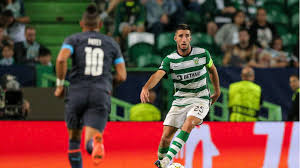


# Scouting Wide Players

Setelah kita menetapkan metode untuk scouting pemain, mari kita lihat posisi terpenting dalam sistem kita; yaitu pemain sayap (wide players). Pemain ini membutuhkan kombinasi yang baik dari beberapa atribut, termasuk:

* **Stamina:** Stamina pemain sangat penting untuk menjaga performa mereka sepanjang pertandingan.
* **Kecepatan (Pace):** Kecepatan pemain sayap berguna untuk melewati pemain lawan dan melakukan serangan balik dengan cepat.
* **Keterampilan Bertahan (Defensive Skills):** Pemain sayap juga perlu memiliki kemampuan bertahan yang baik untuk membantu menjaga keseimbangan permainan saat tim tidak menguasai bola.
* **Umpan (Passing):** Umpan yang akurat dibutuhkan untuk mengalirkan bola ke penyerang atau ke bek tengah yang sudah kita scouting untuk kemampuan umpan panjang mereka.

Karena kita ingin melewati lini tengah dan langsung mengoper bola ke pemain depan, pemain sayap kita tidak harus bisa melakukan crossing bola ke kotak penalti. Mereka selalu bisa mengoper bola kembali ke bek tengah yang sudah kita scouting yang memiliki kemampuan umpan panjang.

Dengan pemikiran tersebut, mari kita latih beberapa model berdasarkan atribut yang kita cari.

In [ ]:
cols = ['power_stamina', 'movement_sprint_speed', 'defending_marking_awareness']
alias = 'wide_attributes'
def_19 = createAverage(df_19, cols, alias)
def_23 = createAverage(df_23, cols, alias)

test_df = pd.merge(df_19,
                   df_23[['player_id', 'wide_attributes']],
                   how = 'inner',
                   suffixes = ['_19','_23'],
                   on = 'player_id')

xcols = ['wide_attributes_19', 'age', 'potential']
ycol = 'wide_attributes_23'
models, predictions = evaluateModels(test_df, xcols, ycol)
models.loc['LassoCV']

100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


Adjusted R-Squared   0.81
R-Squared            0.81
RMSE                 5.81
Time Taken           0.19
Name: LassoCV, dtype: float64

In [ ]:
predict_df = df_23[['wide_attributes', 'age', 'potential']]
predict_df.columns = ['wide_attributes_19', 'age', 'potential']

model = LassoCV()
model.fit(test_df[xcols], test_df[ycol])
df_23['wide_attributes_prediction'] = model.predict(predict_df)
wide_df = df_23[['short_name',
                'overall',
                'value_eur',
                'wage_eur',
                'age',
                'nationality_name',
                'club_name',
                'player_positions',
                'wide_attributes',
                'wide_attributes_prediction']].sort_values(by = ['wide_attributes_prediction'],
                 ascending = False)
DC_df = wide_df[wide_df['club_name'] == 'Manchester United']
DC_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,wide_attributes,wide_attributes_prediction
143689,T. Malacia,79,26500000.00,86000.00,22,Netherlands,Manchester United,LB,80.67,79.73
143508,A. Wan-Bissaka,80,26500000.00,90000.00,24,England,Manchester United,RB,79.33,77.14
143409,L. Martínez,81,35000000.00,95000.00,24,Argentina,Manchester United,"CB, LB, CDM",79.67,76.85
143849,Diogo Dalot,78,21000000.00,78000.00,23,Portugal,Manchester United,RB,76.00,74.78
145876,B. Williams,73,4400000.00,46000.00,21,England,Manchester United,"LB, RB",72.33,74.38


Ketika melihat pemain yang saat ini ada di tim kita, penting untuk memikirkan di mana kebutuhan terbesar dalam tim dalam hal rekrutmen.  

Berdasarkan atribut yang telah kita uraikan untuk pemain sayap, kita sudah memiliki pemain seperti Malacia dan A. Wan-Bissaka yang bisa memainkan peran yang kita uraikan dan akan memiliki kualitas yang wajar di tahun yang kita targetkan sebagai puncak performa tim.

Mengingat hal ini, dan mengingat kita memiliki beberapa jendela transfer untuk bisa beraktivitas, saya percaya akan lebih baik untuk membatasi perekrutan di area ini, dan fokus pada area lain yang memiliki kebutuhan lebih mendesak.

In [ ]:
wide_df = wide_df[(wide_df['value_eur'] < 15000000) & (wide_df['wage_eur'] < 150000)]
wide_df = wide_df[wide_df['age'] < 25]
wide_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,wide_attributes,wide_attributes_prediction
149100,A. Bangura,69,2700000.00,4000.00,22,Sierra Leone,SC Cambuur,LB,81.67,82.41
144333,J. Sánchez,76,11000000.00,13000.00,24,Mexico,Ajax,RB,84.33,81.90
145325,M. Pedersen,74,9000000.00,8000.00,22,Norway,Feyenoord,"RB, LB",81.67,81.23
145272,R. Cannon,74,6000000.00,11000.00,24,United States,Boavista,"RWB, RB, CB",83.00,81.07
144380,D. Ljubičić,76,11000000.00,23000.00,24,Austria,FC Köln,"RM, CDM",83.00,81.07


# Scouting Midfielders

Pemain lini tengah kita harus bisa melakukan beberapa tugas. Pertama, mereka harus bertindak sebagai garis pertahanan pertama, melindungi lini belakang kita dan memotong umpan terobosan ke depan.  Mereka juga perlu menyerang ruang kosong, menerima dan menahan bola umpan panjang dari bek tengah jika diperlukan.

In [ ]:
cols = ['power_stamina', 'mentality_positioning', 'defending_marking_awareness']
alias = 'mid_attributes'
def_19 = createAverage(df_19, cols, alias)
def_23 = createAverage(df_23, cols, alias)

test_df = pd.merge(df_19,
                   df_23[['player_id', 'mid_attributes']],
                   how = 'inner',
                   suffixes = ['_19','_23'],
                   on = 'player_id')

xcols = ['mid_attributes_19', 'age', 'potential']
ycol = 'mid_attributes_23'
models, predictions = evaluateModels(test_df, xcols, ycol)
models.loc['LassoCV']

100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


Adjusted R-Squared   0.86
R-Squared            0.86
RMSE                 5.48
Time Taken           0.19
Name: LassoCV, dtype: float64

In [ ]:
predict_df = df_23[['mid_attributes', 'age', 'potential']]
predict_df.columns = ['mid_attributes_19', 'age', 'potential']

model = LassoCV()
model.fit(test_df[xcols], test_df[ycol])
df_23['mid_attributes_prediction'] = model.predict(predict_df)
mid_df = df_23[['short_name',
                'overall',
                'value_eur',
                'wage_eur',
                'age',
                'nationality_name',
                'club_name',
                'player_positions',
                'mid_attributes',
                'mid_attributes_prediction']].sort_values(by = ['mid_attributes_prediction'],
                 ascending = False)
DC_df = mid_df[mid_df['club_name'] == 'Manchester United']
DC_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,mid_attributes,mid_attributes_prediction
143104,Bruno Fernandes,86,72500000.00,190000.00,27,Portugal,Manchester United,"CAM, CM",81.33,78.36
143062,Casemiro,89,86000000.00,240000.00,30,Brazil,Manchester United,CDM,84.00,77.89
143470,Fred,80,20500000.00,120000.00,29,Brazil,Manchester United,"CM, CDM",79.67,76.31
143409,L. Martínez,81,35000000.00,95000.00,24,Argentina,Manchester United,"CB, LB, CDM",76.67,76.30
143529,S. McTominay,80,25000000.00,100000.00,25,Scotland,Manchester United,"CDM, CM",76.67,76.08


In [ ]:
mid_df = mid_df[(mid_df['value_eur'] < 80000000) & (mid_df['wage_eur'] < 200000)]
mid_df = mid_df[mid_df['age'] < 22]
mid_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,mid_attributes,mid_attributes_prediction
143885,E. Fernández,78,31500000.00,12000.00,21,Argentina,Benfica,"CM, CDM",78.00,79.84
143549,J. Frimpong,80,31500000.00,38000.00,21,Netherlands,Bayer 04 Leverkusen,"RB, RWB",77.67,79.72
144110,M. Ugarte,77,23500000.00,11000.00,21,Uruguay,Sporting CP,"CM, CDM",77.33,79.59
143706,E. Camavinga,79,38000000.00,78000.00,19,France,Real Madrid,"CM, CDM",76.33,79.47
143186,A. Davies,84,60500000.00,59000.00,21,Canada,FC Bayern München,"LB, LM",78.00,79.44


# Scouting Forwards

Terakhir, kita akan melihat pemain depan potensial untuk sistem permainan kita.  Seperti yang telah diuraikan sebelumnya, para pemain depan kita harus bisa menerima umpan panjang dan terobosan serta memiliki kecepatan dan kecerdasan taktis untuk bisa menyerang ruang di belakang pemain bertahan lawan.

In [ ]:
cols = ['skill_ball_control', 'mentality_positioning', 'movement_sprint_speed', 'attacking_finishing']
alias = 'atk_attributes'
def_19 = createAverage(df_19, cols, alias)
def_23 = createAverage(df_23, cols, alias)

test_df = pd.merge(df_19,
                   df_23[['player_id', 'atk_attributes']],
                   how = 'inner',
                   suffixes = ['_19','_23'],
                   on = 'player_id')

xcols = ['atk_attributes_19', 'age', 'potential']
ycol = 'atk_attributes_23'
models, predictions = evaluateModels(test_df, xcols, ycol)
models.loc['LassoCV']

100%|██████████| 30/30 [00:33<00:00,  1.11s/it]


Adjusted R-Squared   0.92
R-Squared            0.92
RMSE                 4.53
Time Taken           0.17
Name: LassoCV, dtype: float64

In [ ]:
predict_df = df_23[['atk_attributes', 'age', 'potential']]
predict_df.columns = ['atk_attributes_19', 'age', 'potential']

model = LassoCV()
model.fit(test_df[xcols], test_df[ycol])
df_23['atk_attributes_prediction'] = model.predict(predict_df)
atk_df = df_23[['short_name',
                'overall',
                'value_eur',
                'wage_eur',
                'age',
                'nationality_name',
                'club_name',
                'player_positions',
                'atk_attributes',
                'atk_attributes_prediction']].sort_values(by = ['atk_attributes_prediction'],
                 ascending = False)
DC_df = atk_df[atk_df['club_name'] == 'Manchester United']
DC_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,atk_attributes,atk_attributes_prediction
143322,Antony,82,49000000.00,130000.00,22,Brazil,Manchester United,"RW, RM",82.75,83.19
143395,M. Rashford,81,37000000.00,120000.00,24,England,Manchester United,"LW, ST",82.50,81.95
143183,J. Sancho,84,61500000.00,155000.00,22,England,Manchester United,"LW, RW, LM",81.00,81.51
143055,Cristiano Ronaldo,90,41000000.00,220000.00,37,Portugal,Manchester United,ST,89.75,79.38
143476,A. Martial,80,28000000.00,125000.00,26,France,Manchester United,"ST, LM",80.75,79.13


In [ ]:
atk_df = atk_df[(atk_df['value_eur'] < 100000000) & (atk_df['wage_eur'] < 250000)]
atk_df = atk_df[atk_df['age'] < 25]
atk_df.head()

,short_name,overall,value_eur,wage_eur,age,nationality_name,club_name,player_positions,atk_attributes,atk_attributes_prediction
143112,C. Nkunku,86,94000000.00,90000.00,24,France,RB Leipzig,"CF, CAM, ST",87.25,86.03
143237,V. Osimhen,83,58000000.00,72000.00,23,Nigeria,Napoli,ST,86.50,86.00
143200,D. Vlahović,84,86500000.00,140000.00,22,Serbia,Juventus,ST,85.75,85.72
143711,Ansu Fati,79,38000000.00,84000.00,19,Spain,FC Barcelona,LW,82.25,84.53
143197,Rafael Leão,84,66500000.00,90000.00,23,Portugal,Milan,"LW, LM",85.00,84.43


# Closing

Analisa yang kita buat ini memiliki keterbatasan dan lebih merupakan eksperimen pemikiran dibanding analisa sepakbola yang sesungguhnya.

Berikut adalah poin-poin penting :

1. Prediksi Masa Depan: Sulit untuk memastikan keakuratan prediksi kita tentang pemain muda dan bagaimana mereka akan berkembang di masa depan.

2. Keterbatasan Dataset: Data yang kita gunakan dari basis data FIFA mungkin tidak sepenuhnya mencerminkan realita dunia sepak bola profesional. Klub papan atas umumnya memiliki tim scouting tersendiri dan menggunakan data yang lebih komprehensif untuk merekrut pemain.

3. Regresi Pemain: Kita telah melihat bahwa kemampuan pemain tidak selalu meningkat secara linear, dan ada kemungkinan pemain yang kita harapkan berkembang malah mengalami penurunan performa.
Sangat menarik untuk meninjau kembali analisa ini pada tahun-tahun mendatang dan melihat perkembangan para pemain yang kita identifikasi sebagai target transfer, serta kemajuan klub secara keseluruhan.

Kesimpulannya, analisa ini memberikan gambaran tentang bagaimana metode berbasis data bisa dimanfaatkan dalam perekrutan pemain. Namun, perlu diingat bahwa analisa ini memiliki keterbatasan dan sebaiknya tidak digunakan sebagai satu-satunya sumber untuk mengambil keputusan transfer pemain.